In [10]:
from barplots import barplots
import pandas as pd

In [11]:
df = pd.read_csv("node_label_performance.csv", index_col=0).reset_index(drop=True)
df = df.drop(columns="holdout_number")

In [63]:
validation = df[df.run_type=="validation"]
validation = validation.drop(columns=["run_type"])
for index, metrics in validation.groupby(["graph_name", "node_embedding_method_name"]):
    print(index, metrics["accuracy"].agg(["mean", "std"]))

('CiteSeer', 'CBOW') mean    0.772519
std     0.016459
Name: accuracy, dtype: float64
('CiteSeer', 'GloVe') mean    0.776336
std     0.015590
Name: accuracy, dtype: float64
('CiteSeer', 'SkipGram') mean    0.768397
std     0.015997
Name: accuracy, dtype: float64
('Cora', 'CBOW') mean    0.880183
std     0.009278
Name: accuracy, dtype: float64
('Cora', 'GloVe') mean    0.879266
std     0.008105
Name: accuracy, dtype: float64
('Cora', 'SkipGram') mean    0.884037
std     0.009585
Name: accuracy, dtype: float64
('PubMedDiabetes', 'CBOW') mean    0.882530
std     0.004635
Name: accuracy, dtype: float64
('PubMedDiabetes', 'GloVe') mean    0.882378
std     0.003900
Name: accuracy, dtype: float64
('PubMedDiabetes', 'SkipGram') mean    0.882936
std     0.003054
Name: accuracy, dtype: float64


In [81]:

others = pd.DataFrame({
    ("CiteSeer", "SplineCNN"): [79.20, 0],
    ("CiteSeer", "ASGCN"): [79.66, 0.18],
    ("CiteSeer", "GCNII"): [77.13, 0],
    ("Cora", "SplineCNN"): [89.48, 0.31],
    ("Cora", "ASGCN"): [87.44, 0.34],
    ("Cora", "GCNII"): [88.49, 0],
    ("PubMedDiabetes", "SplineCNN"): [88.88, 0],
    ("PubMedDiabetes", "ASGCN"): [90.60, 0.16],
    ("PubMedDiabetes", "GCNII"): [90.30, 0],
}).T / 100
others.columns = pd.MultiIndex([("accuracy", "mean"), ("accuracy", "std")])
others

mean     std
CiteSeer       SplineCNN  0.7920  0.0000
               ASGCN      0.7966  0.0018
               GCNII      0.7713  0.0000
Cora           SplineCNN  0.8948  0.0031
               ASGCN      0.8744  0.0034
               GCNII      0.8849  0.0000
PubMedDiabetes SplineCNN  0.8888  0.0000
               ASGCN      0.9060  0.0016
               GCNII      0.9030  0.0000

In [82]:
data = pd.concat([
    validation.groupby(by=["graph_name", "node_embedding_method_name"]).agg(["mean", "std"]),
    others
]).dropna(axis=1).reset_index()

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/multi.py:3587: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  uniq_tuples = lib.fast_unique_multiple([self._values, other._values], sort=sort)


AttributeError: 'NoneType' object has no attribute 'is_extension'

In [75]:
data

,graph_name,node_embedding_method_name,mean,std
0,CiteSeer,CBOW,0.772519,0.016459
1,CiteSeer,GloVe,0.776336,0.015590
2,CiteSeer,SkipGram,0.768397,0.015997
3,Cora,CBOW,0.880183,0.009278
4,Cora,GloVe,0.879266,0.008105
5,Cora,SkipGram,0.884037,0.009585
6,PubMedDiabetes,CBOW,0.882530,0.004635
7,PubMedDiabetes,GloVe,0.882378,0.003900
8,PubMedDiabetes,SkipGram,0.882936,0.003054
9,CiteSeer,SplineCNN,0.792000,0.000000


Rendering barplots:   0%|          | 0/2 [00:00<?, ?it/s]

((<Figure size 2400x360 with 3 Axes>, <Figure size 2400x360 with 3 Axes>),
 (array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe58a3fced0>,
        dtype=object),
  array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe58a3fcf50>,
        dtype=object)))

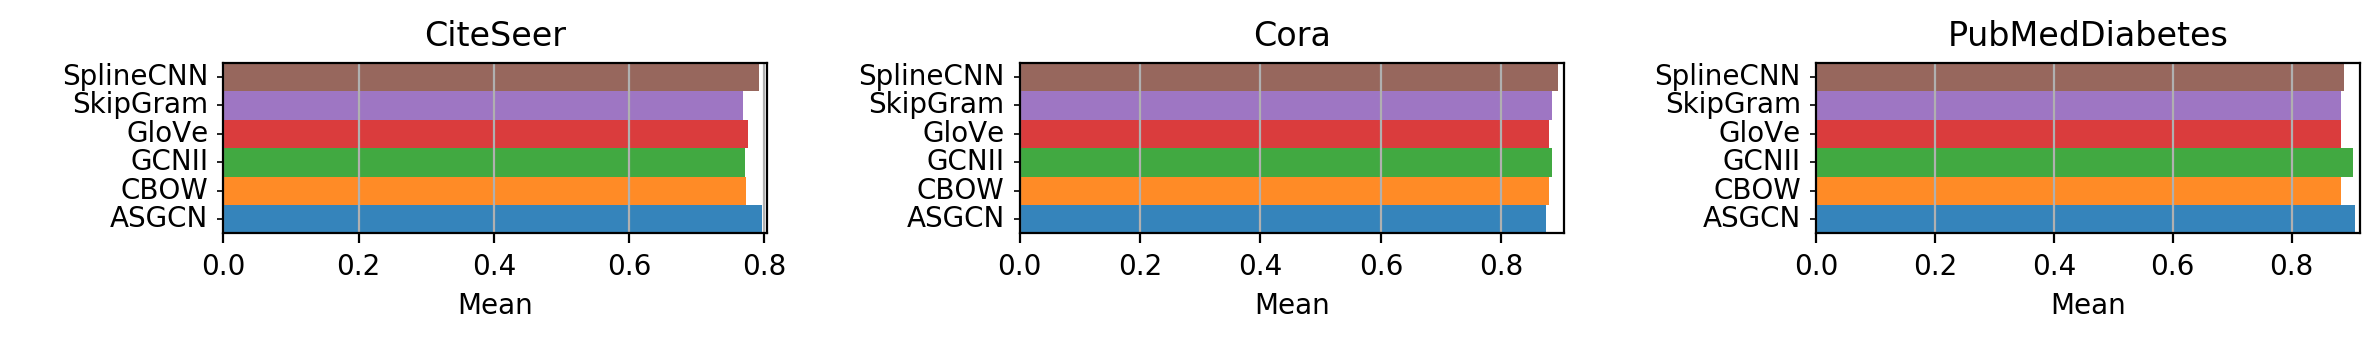

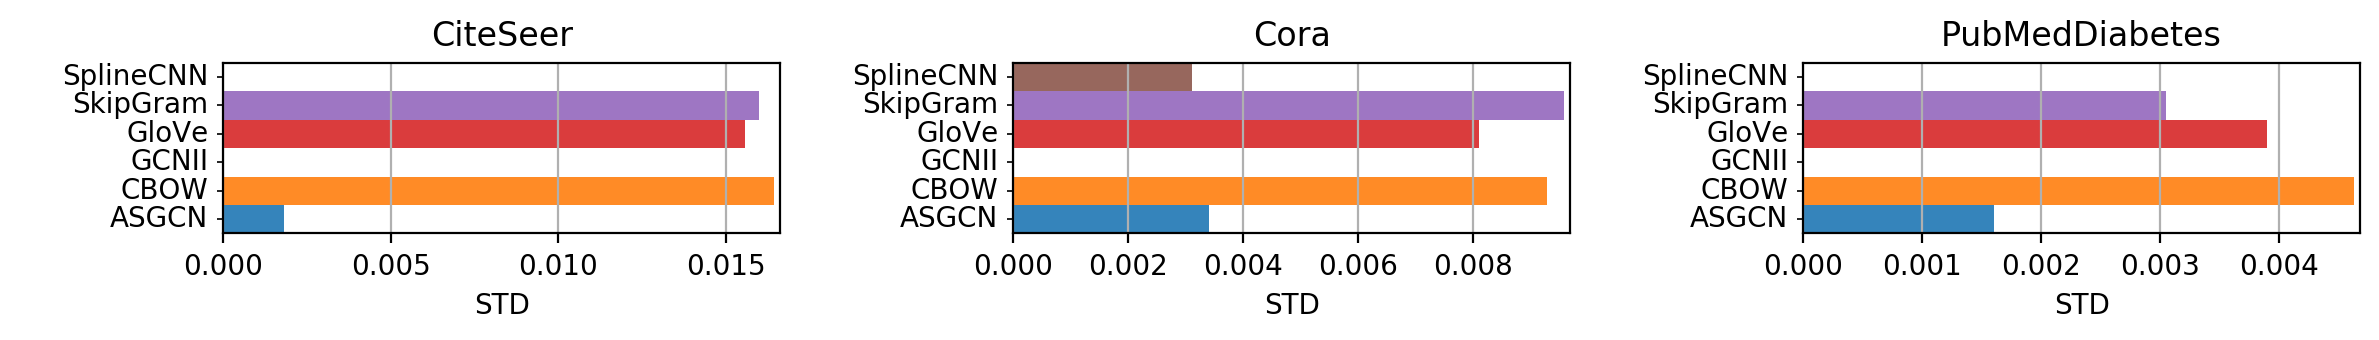

In [76]:
barplots(
    data,
    groupby=["graph_name", "node_embedding_method_name"],
    subplots=True,
    show_legend=False,
    show_standard_deviation=False,
    orientation="horizontal",
    height=4
)